<a href="https://colab.research.google.com/github/gitusermat/Data-Science-Project/blob/main/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn openpyxl


In [ ]:
#1 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline

In [ ]:
#2 Load the dataset
df = pd.read_csv('/content/pokemon.csv')

# Display the first few rows of the dataset
print(df.head())

# Get a summary of each column (data types, missing values, etc.)
df.info()

# Check for missing values
print(df.isnull().sum())

# Verify that all columns are numeric
print(df.dtypes)

# Display summary statistics
print(df.describe())

     id  user_id  QoA_VLCresolution  QoA_VLCbitrate  QoA_VLCframerate  \
0   590       71                360       528.39294         24.950000   
1   428       46                360       402.64664         30.066667   
2   406       44                360       735.84070         24.200000   
3  1256      133                240       529.48830         24.116667   
4   244       22                360       736.00085         24.066667   

   QoA_VLCdropped  QoA_VLCaudiorate  QoA_VLCaudioloss  QoA_BUFFERINGcount  \
0               0         43.800000                 0                   2   
1               0         44.200000                 0                   2   
2               0         44.183333                 0                   2   
3               9         43.850000                 0                   2   
4               0         43.850000                 0                   2   

   QoA_BUFFERINGtime  ...       QoD_os-version  QoD_api-level QoU_sex QoU_age  \
0                

In [ ]:
# Ensure df is not a view of another DataFrame
df = df.copy()

# Handle missing values (updated version to avoid chained assignment)
df['QoA_VLCbitrate'] = df['QoA_VLCbitrate'].fillna(df['QoA_VLCbitrate'].mean())
df['QoS_operator'] = df['QoS_operator'].fillna(df['QoS_operator'].mode()[0])

# Encode categorical variables
label_encoder = LabelEncoder()
non_numeric_cols = df.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Define numerical features (updated step)
numerical_features = ['QoA_VLCbitrate', 'QoA_VLCframerate', 'QoA_BUFFERINGtime']


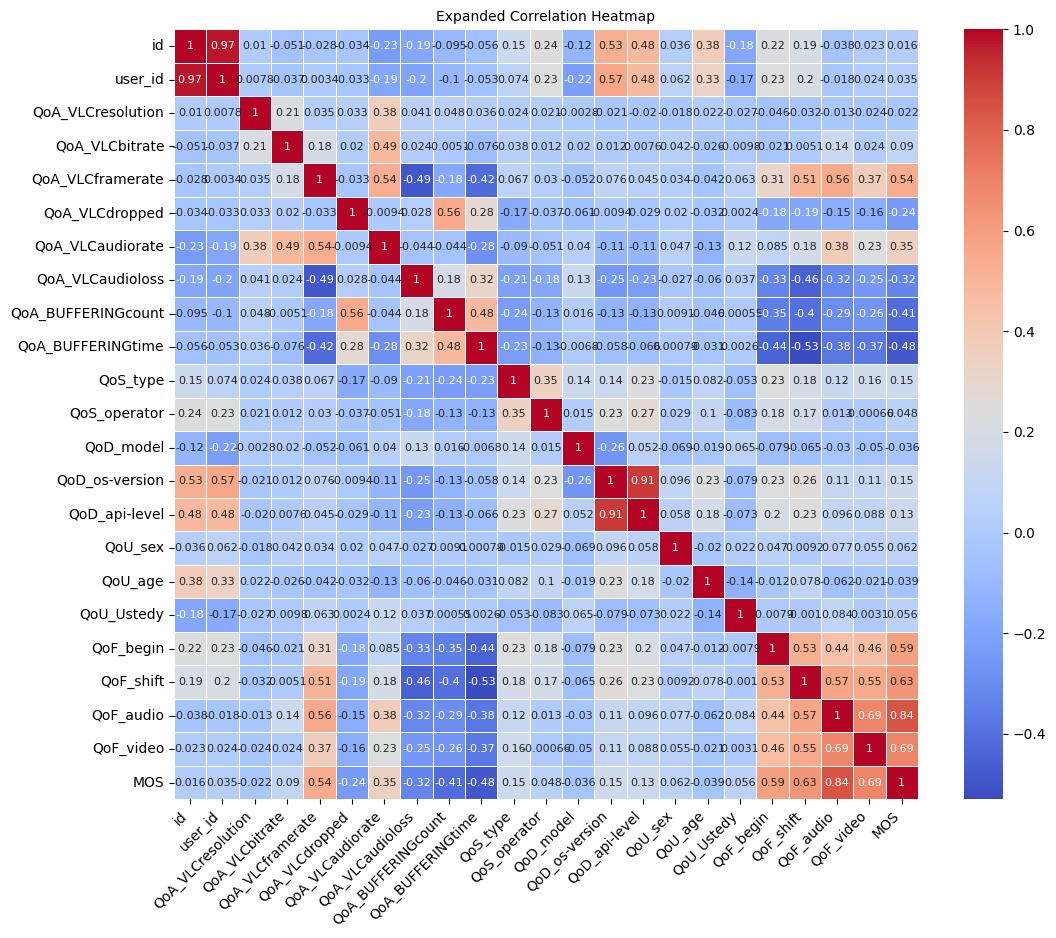

In [ ]:
# Expanded Correlation Heatmap (Updated for Better Readability)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Expanded Correlation Heatmap', fontsize=10)
plt.show()


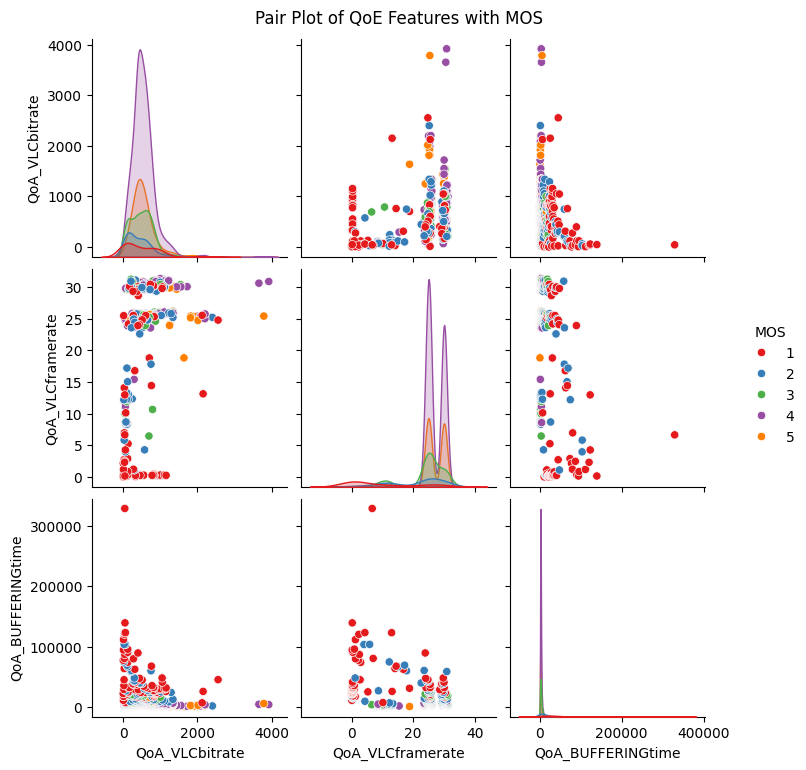

In [ ]:
# Pair Plot for QoA and MOS befor training
sns.pairplot(df[['QoA_VLCbitrate', 'QoA_VLCframerate', 'QoA_BUFFERINGtime', 'MOS']], hue='MOS', palette='Set1')
plt.suptitle('Pair Plot of QoE Features with MOS', y=1.02)
plt.show()

<ipython-input-6-64a2a9426f48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MOS', data=df, palette='viridis')


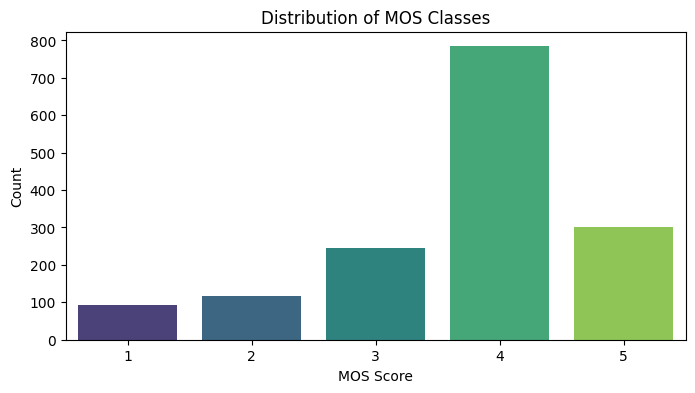

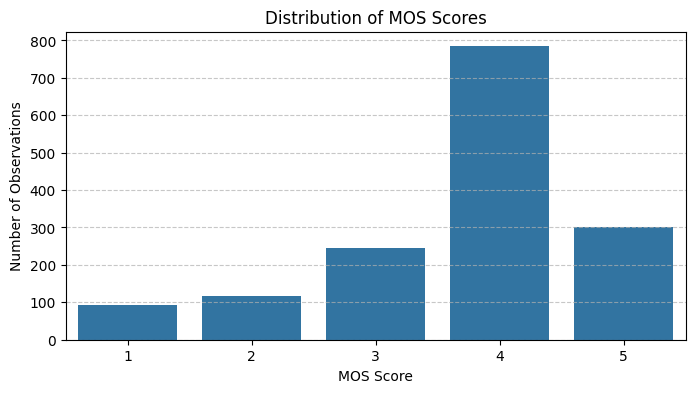

In [ ]:
# Count Plot of MOS Classes
plt.figure(figsize=(8, 4))
sns.countplot(x='MOS', data=df, palette='viridis')
plt.title('Distribution of MOS Classes')
plt.xlabel('MOS Score')
plt.ylabel('Count')
plt.show()

# Count Plot of MOS Classes without palette to remove the FutureWarning
plt.figure(figsize=(8, 4))
sns.countplot(x='MOS', data=df)
plt.title('Distribution of MOS Scores')
plt.xlabel('MOS Score')
plt.ylabel('Number of Observations')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


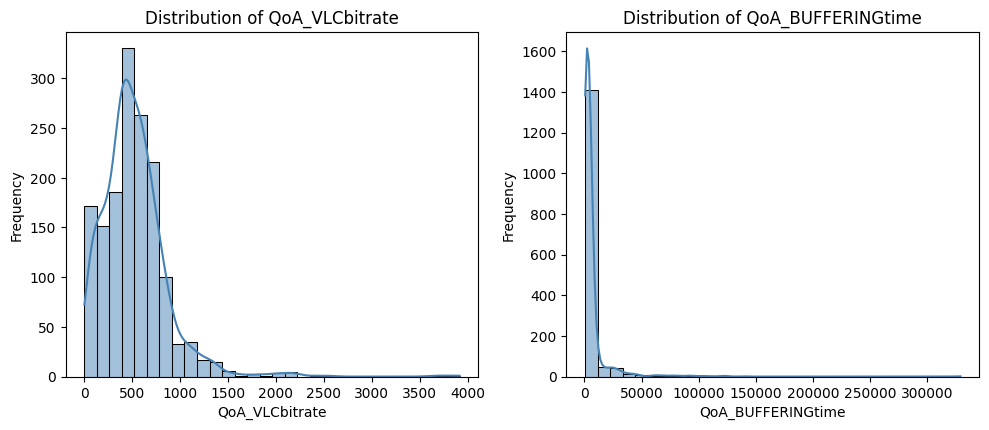

In [ ]:
# Relevant numeric features based on domain knowledge or feature importance
relevant_features = ['QoA_VLCbitrate', 'QoA_BUFFERINGtime']

# Plot distributions of relevant features
plt.figure(figsize=(15, 8))  # Adjust figure size for better visualization
for i, col in enumerate(relevant_features, 1):
    plt.subplot(2, 3, i)  # Adjust grid size based on the number of features
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Ensure proper spacing between plots
plt.show()


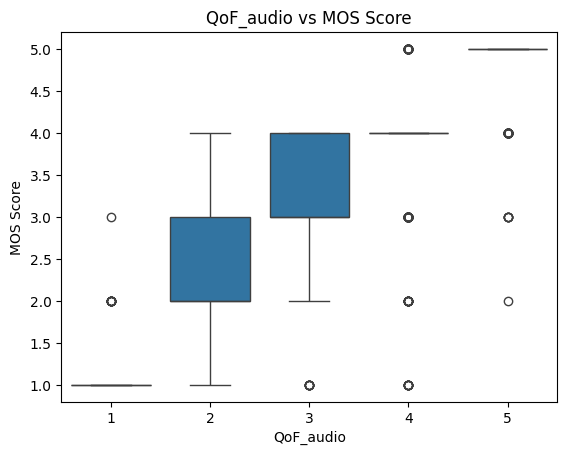

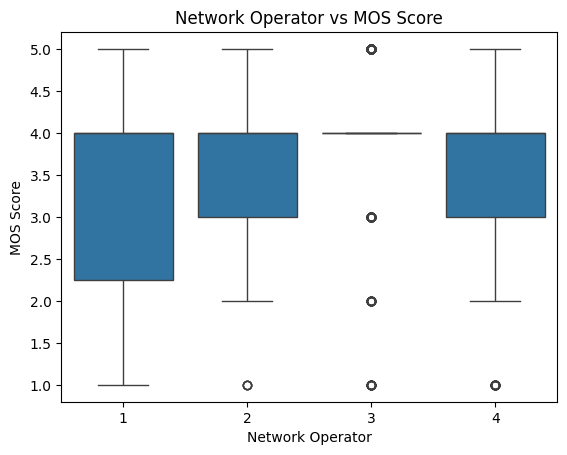

<ipython-input-8-75546c57bbcf>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='QoA_BUFFERINGcount', y='MOS', data=df, palette='coolwarm')


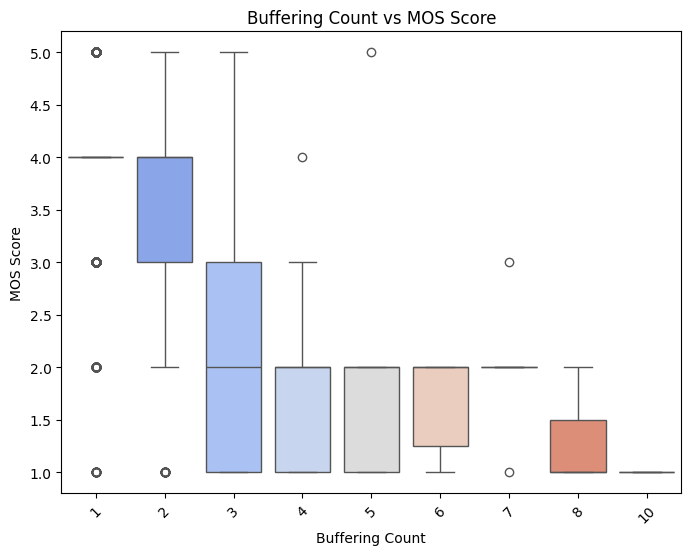

In [ ]:
# Boxplot for QoS_operator vs. MOS
sns.boxplot(x='QoF_audio', y='MOS', data=df)
plt.title('QoF_audio vs MOS Score')
plt.xlabel('QoF_audio')
plt.ylabel('MOS Score')
plt.show()
# Boxplot for QoS_operator vs. MOS
sns.boxplot(x='QoS_operator', y='MOS', data=df)
plt.title('Network Operator vs MOS Score')
plt.xlabel('Network Operator')
plt.ylabel('MOS Score')
plt.show()
# Boxplot for Buffering Time vs MOS Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='QoA_BUFFERINGcount', y='MOS', data=df, palette='coolwarm')
plt.title('Buffering Count vs MOS Score')
plt.xlabel('Buffering Count')
plt.ylabel('MOS Score')
plt.xticks(rotation=45)
plt.show()

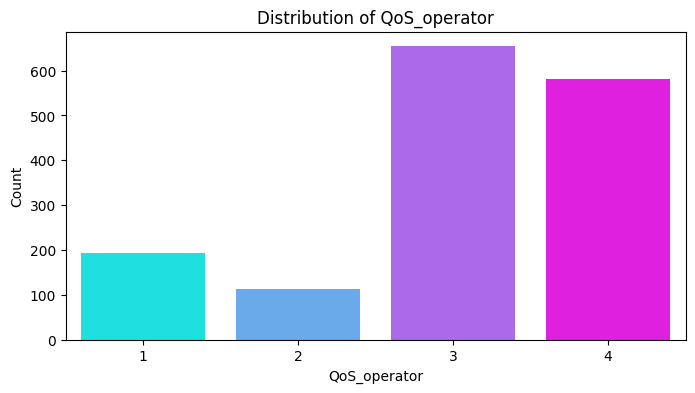

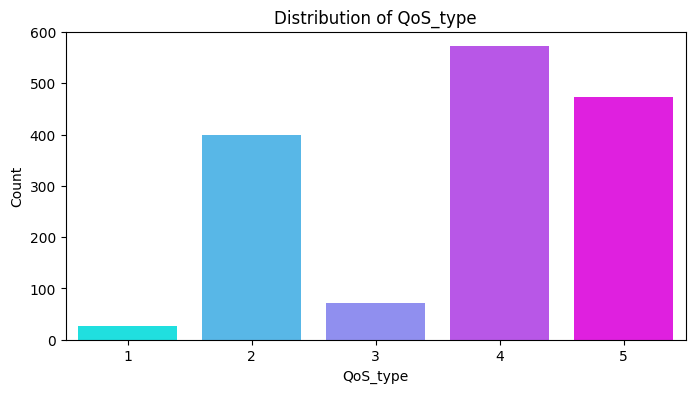

In [ ]:
# Visualization: Categorical Feature Analysis
categorical_columns = ['QoS_operator', 'QoS_type']  # Adjust based on relevant categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue=col, data=df, palette='cool', dodge=False, legend=False)  # Added 'hue' and 'legend=False'
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Preprocessing

In [ ]:
# Dropping irrelevant features based on correlation
irrelevant_features = ['QoD_model', 'QoD_os-version', 'id', 'user_id']  # List of irrelevant features
df = df.drop(columns=irrelevant_features)


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['MOS'])  # Replace 'MOS' with your target variable
y = df['MOS']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


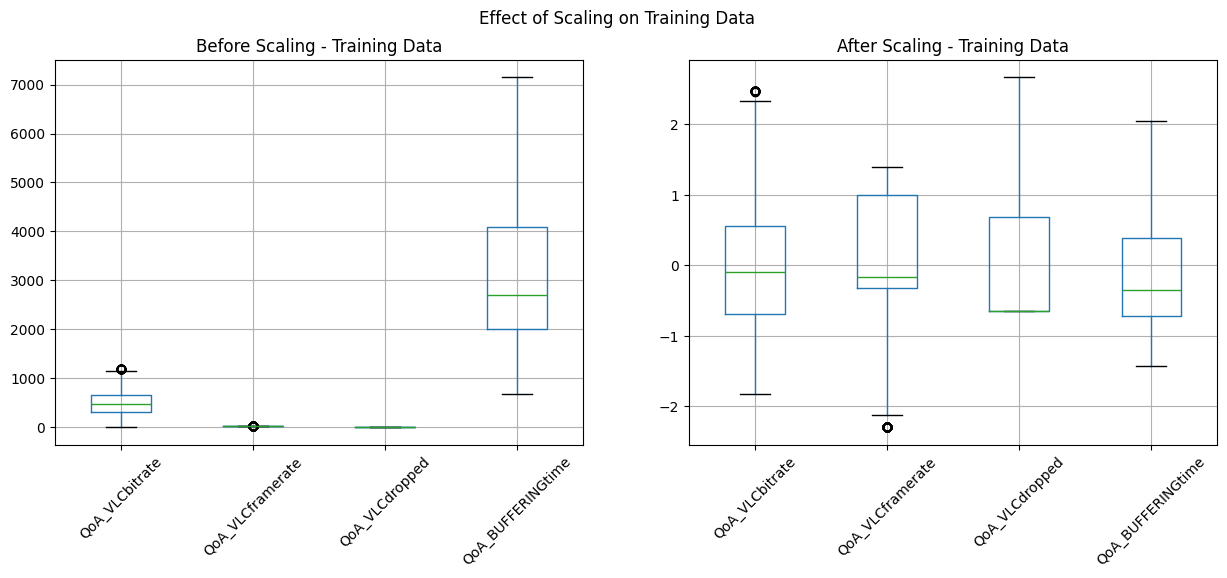

In [ ]:
# List of numeric features to scale
#numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
#scaler = StandardScaler()

# Fit on training data and transform training data
#X_train_scaled = X_train.copy()
#X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform test data using the same scaler
#X_test_scaled = X_test.copy()
#X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])


# Splitting the data
#X = df.drop(columns=['MOS'])  # Replace 'MOS' with your target variable
#y = df['MOS']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Define the numeric features to scale
numeric_features = ['QoA_VLCbitrate', 'QoA_VLCframerate', 'QoA_VLCdropped', 'QoA_BUFFERINGtime']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = X_train.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform the test data using the SAME scaler
X_test_scaled = X_test.copy()
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

# Visualizing the Effect of Scaling
plt.figure(figsize=(15, 5))

# Boxplot for training data before scaling
plt.subplot(1, 2, 1)
X_train[numeric_features].boxplot()
plt.title("Before Scaling - Training Data")
plt.xticks(rotation=45)

# Boxplot for training data after scaling
plt.subplot(1, 2, 2)
X_train_scaled[numeric_features].boxplot()
plt.title("After Scaling - Training Data")
plt.xticks(rotation=45)

plt.suptitle("Effect of Scaling on Training Data")
plt.show()



In [ ]:
# Display the class distribution before SMOTE
print("Class distribution in training set before SMOTE:", Counter(y_train))
print("Class distribution in test set:", Counter(y_test))

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the class distribution after SMOTE
print("Class distribution in training set after SMOTE:", Counter(y_train_resampled))

# Note: The test set (X_test, y_test) is not modified.


Class distribution in training set before SMOTE: Counter({4: 627, 5: 242, 3: 197, 2: 94, 1: 74})
Class distribution in test set: Counter({4: 157, 5: 60, 3: 49, 2: 24, 1: 19})
Class distribution in training set after SMOTE: Counter({4: 627, 3: 627, 5: 627, 2: 627, 1: 627})


Model Traning Part

Best parameters for Random Forest: {'model__class_weight': 'balanced', 'model__max_depth': 20, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Decision Tree Cross-Validation Results:
              precision    recall  f1-score   support

           1       0.91      0.89      0.90       627
           2       0.81      0.83      0.82       627
           3       0.79      0.80      0.79       627
           4       0.72      0.81      0.76       627
           5       0.91      0.78      0.84       627

    accuracy                           0.82      3135
   macro avg       0.83      0.82      0.82      3135
weighted avg       0.83      0.82      0.82      3135

Random Forest Cross-Validation Results:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       627
           2       0.90      0.92      0.91       627
           3       0.86      0.89      0.87       627
           4       0.79      

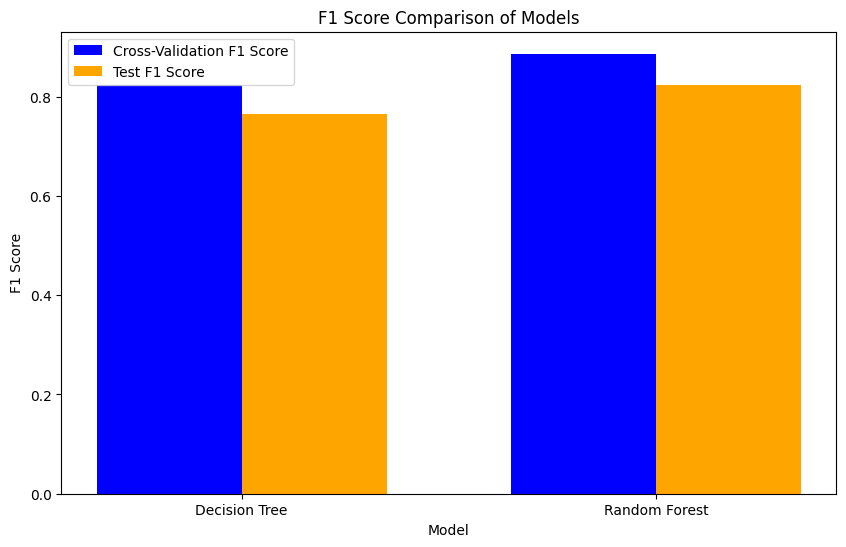

Better Model: Random Forest


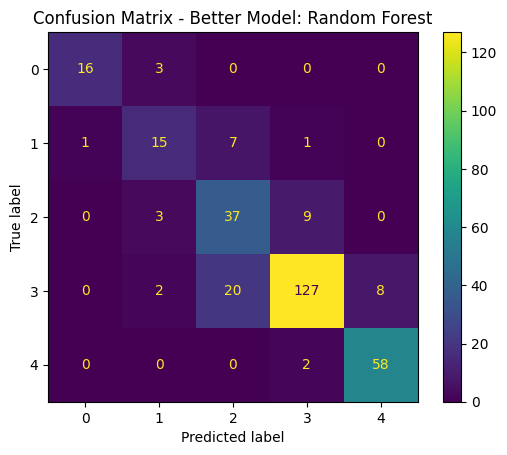

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Apply SMOTE for oversampling on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Decision Tree pipeline
pipeline_tree = Pipeline([
    ('model', DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42))
])

# Define Random Forest pipeline
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [10, 20],
    'model__min_samples_leaf': [5, 10],
    'model__class_weight': ['balanced']
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=cv, scoring='f1_weighted', n_jobs=-1)
grid_rf.fit(X_train_resampled, y_train_resampled)

# Use the best Random Forest model
best_rf_pipeline = grid_rf.best_estimator_
print("Best parameters for Random Forest:", grid_rf.best_params_)

# Perform cross-validation for Decision Tree
y_pred_tree_cv = cross_val_predict(pipeline_tree, X_train_resampled, y_train_resampled, cv=cv)
f1_tree_cv = f1_score(y_train_resampled, y_pred_tree_cv, average='weighted')
print("Decision Tree Cross-Validation Results:")
print(classification_report(y_train_resampled, y_pred_tree_cv))

# Perform cross-validation for Random Forest
y_pred_rf_cv = cross_val_predict(best_rf_pipeline, X_train_resampled, y_train_resampled, cv=cv)
f1_rf_cv = f1_score(y_train_resampled, y_pred_rf_cv, average='weighted')
print("Random Forest Cross-Validation Results:")
print(classification_report(y_train_resampled, y_pred_rf_cv))

# Evaluate Decision Tree on the test set
pipeline_tree.fit(X_train_resampled, y_train_resampled)
y_pred_tree_test = pipeline_tree.predict(X_test)
f1_tree_test = f1_score(y_test, y_pred_tree_test, average='weighted')
print("Decision Tree Test Results:")
print(classification_report(y_test, y_pred_tree_test))

# Evaluate Random Forest on the test set
best_rf_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_rf_test = best_rf_pipeline.predict(X_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test, average='weighted')
print("Random Forest Test Results:")
print(classification_report(y_test, y_pred_rf_test))

# Compare F1 Scores
models = ['Decision Tree', 'Random Forest']
f1_scores_cv = [f1_tree_cv, f1_rf_cv]
f1_scores_test = [f1_tree_test, f1_rf_test]

plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, f1_scores_cv, width, label='Cross-Validation F1 Score', color='blue')
plt.bar(x + width/2, f1_scores_test, width, label='Test F1 Score', color='orange')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Models')
plt.xticks(x, models)
plt.legend()
plt.show()

# Confusion Matrix for the Best Model
if f1_rf_test > f1_tree_test:
    best_model_name = "Random Forest"
    best_y_pred_test = y_pred_rf_test
    best_cm = confusion_matrix(y_test, best_y_pred_test)
else:
    best_model_name = "Decision Tree"
    best_y_pred_test = y_pred_tree_test
    best_cm = confusion_matrix(y_test, best_y_pred_test)

print(f"Better Model: {best_model_name}")
ConfusionMatrixDisplay(best_cm).plot()
plt.title(f'Confusion Matrix - Better Model: {best_model_name}')
plt.show()


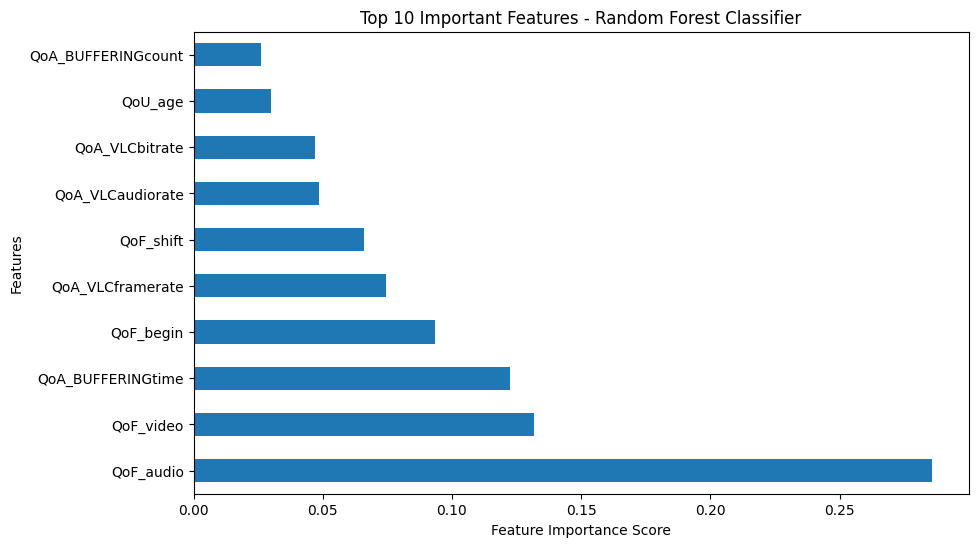

In [ ]:
# Assuming X_train_scaled and y_train are already defined (features and target after scaling)
# Define and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=5,
                                min_samples_split=10, class_weight='balanced', random_state=42)

# Fit the model on training data
rf_clf.fit(X_train_scaled, y_train)

# Feature importance from Random Forest Classifier
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_train_scaled.columns)

# Plot the Top 10 Important Features
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest Classifier')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()
